# Data Cleaning and Preparation

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [11]:
#Loading a dataset into dataframe cardio
cardio = pd.read_csv("C:\\users\\sony\\desktop\\aiman D.Sc\\cardiotocographic.csv")
cardio

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
#displaying the first few rows of dataframe
print(cardio.head())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [6]:
cardio.shape

(2126, 14)

In [7]:
cardio.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [8]:
cardio.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [5]:
#checking missing values 
missing_values = cardio.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [12]:
#handling missing values
columns_with_missing_values = ['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']
for col in columns_with_missing_values:
    mean_value = cardio[col].mean()
    cardio[col].fillna(mean_value, inplace=True)

In [17]:
# Outlier detection and treatment
from scipy.stats import zscore

In [18]:
z_scores = zscore(cardio.select_dtypes(include=['float64', 'int64']))
threshold = 3
outlier_mask = (abs(z_scores) > threshold).any(axis=1)
cardio_cleaned = cardio[~outlier_mask]

In [20]:
#DataFrame without outliers
cardio_cleaned

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,140.000000,0.000000,0.000000,0.004975,0.001244,0.0,0.0,77.0,0.7,17.000000,6.0,31.0,0.000000,1.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


# Statistical Summary

In [21]:
# Calculate measures of central tendency and dispersion
summary_statistics = cardio.describe()
print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.00135

# Data Visualization

In [22]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

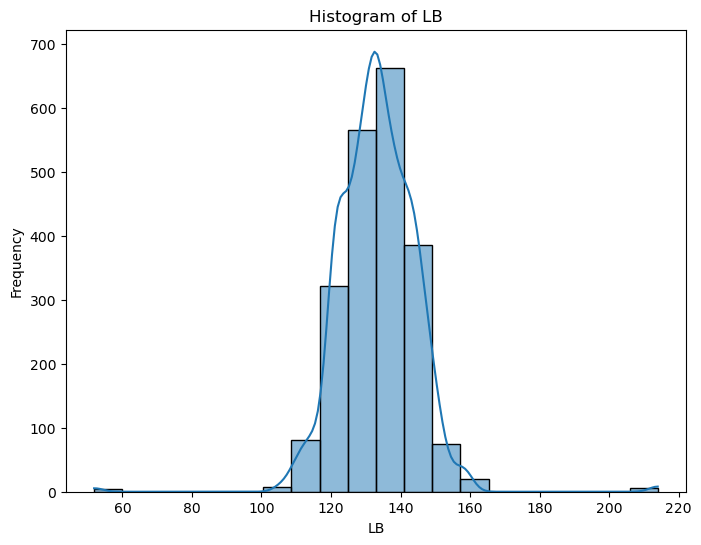

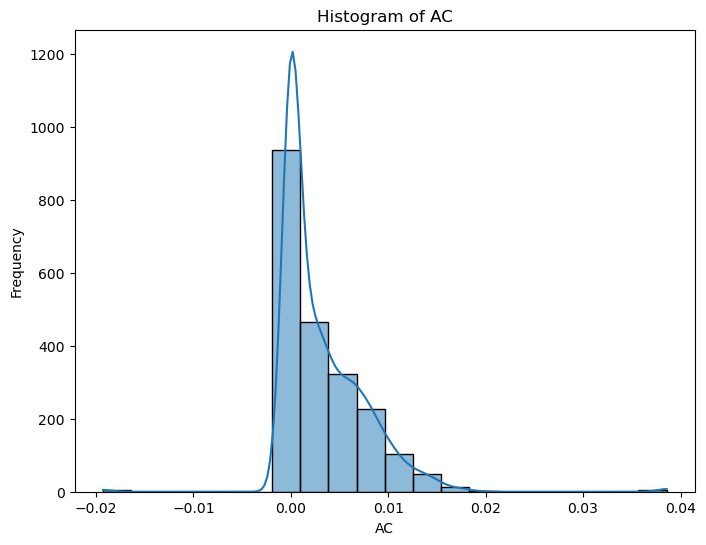

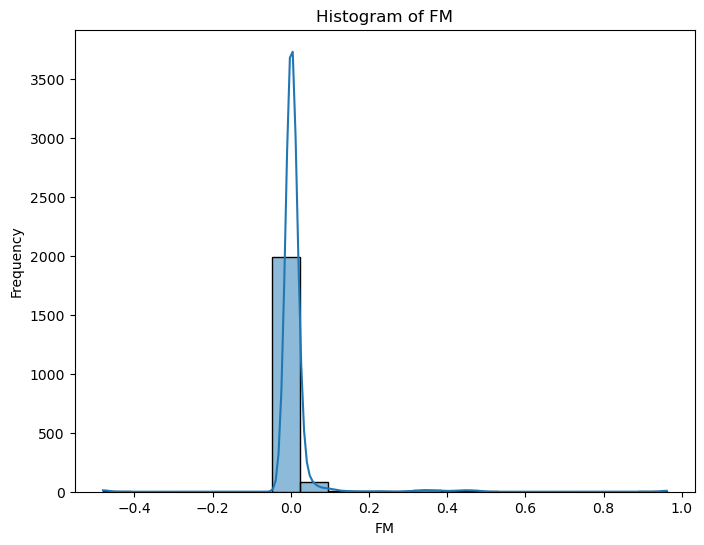

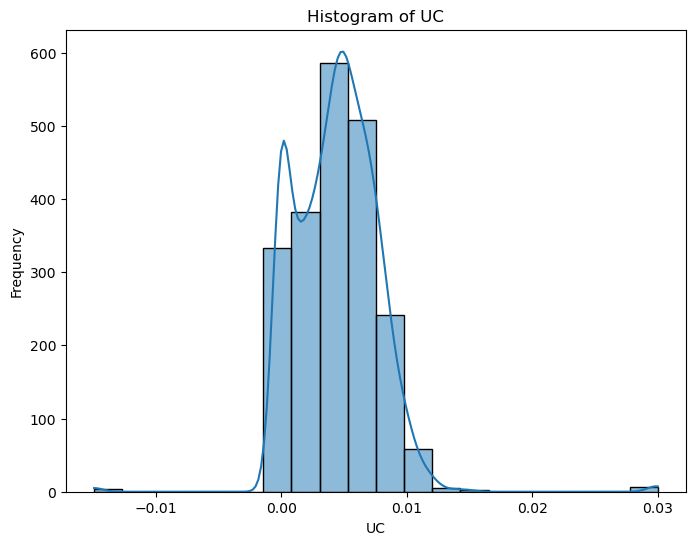

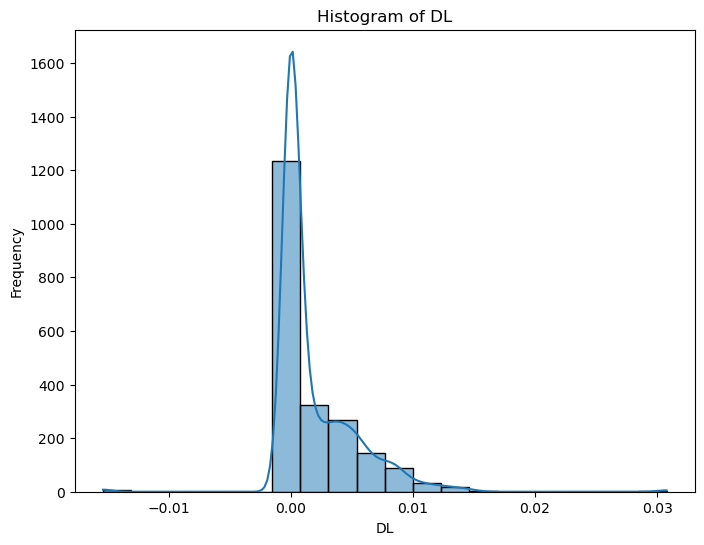

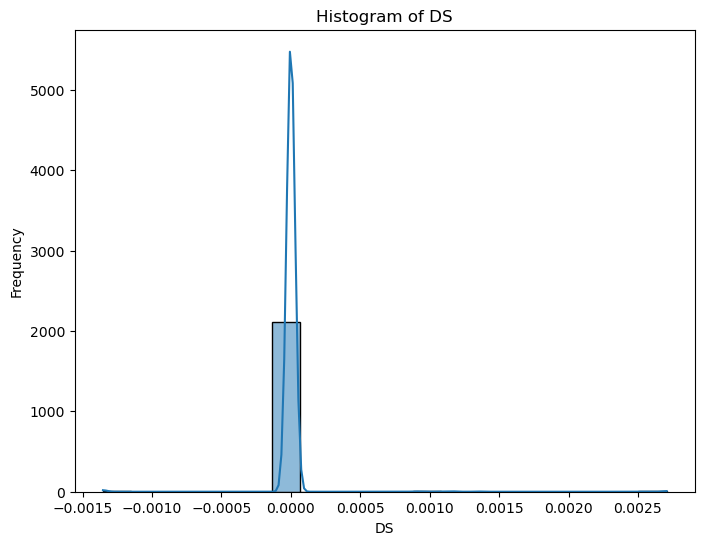

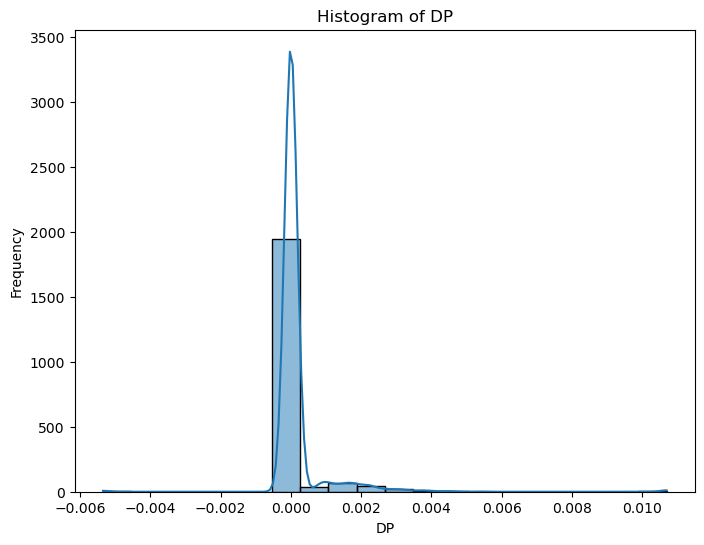

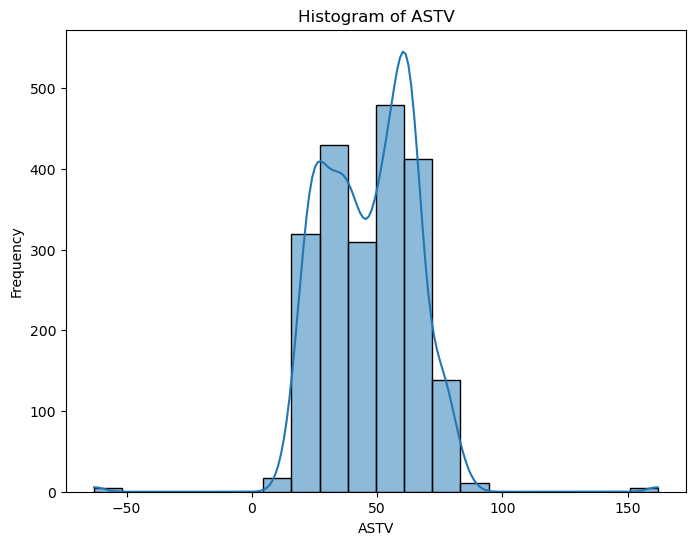

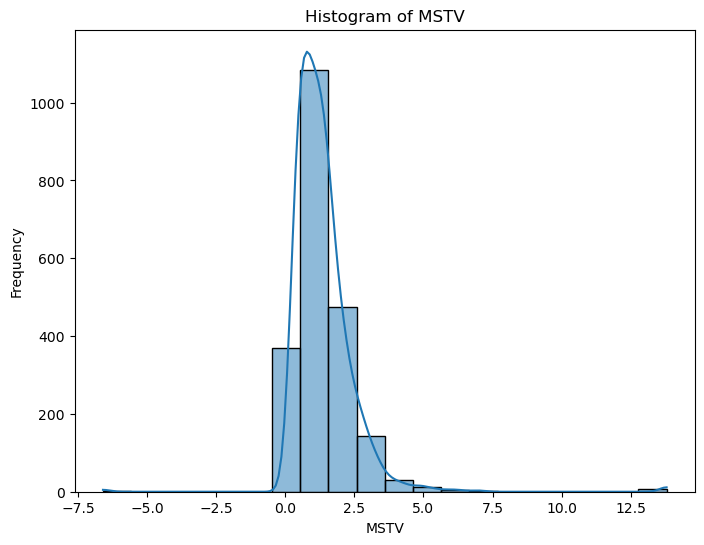

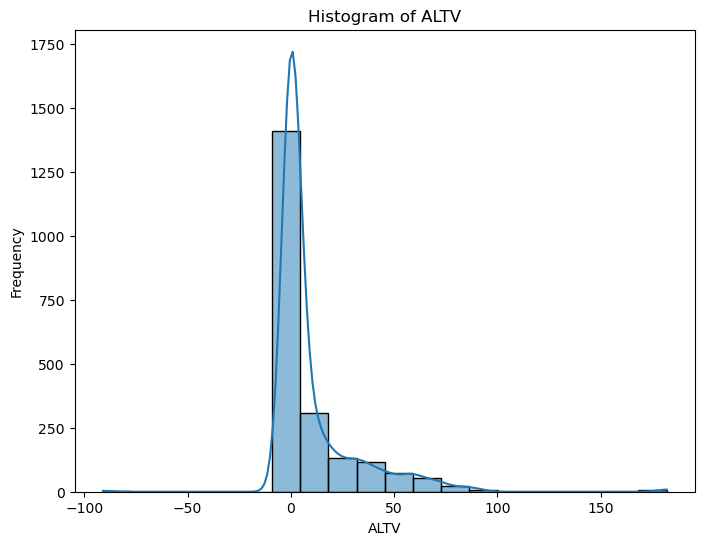

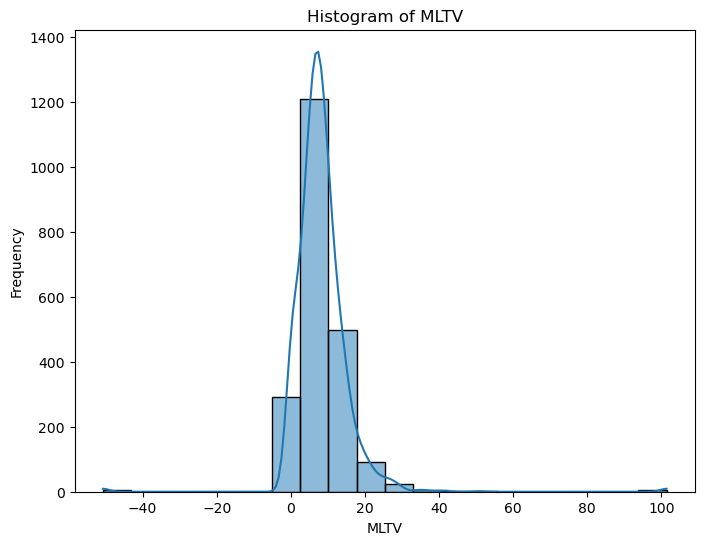

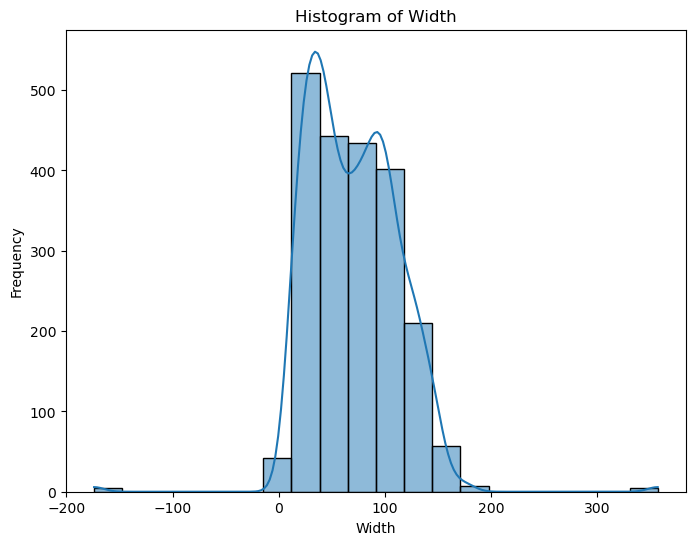

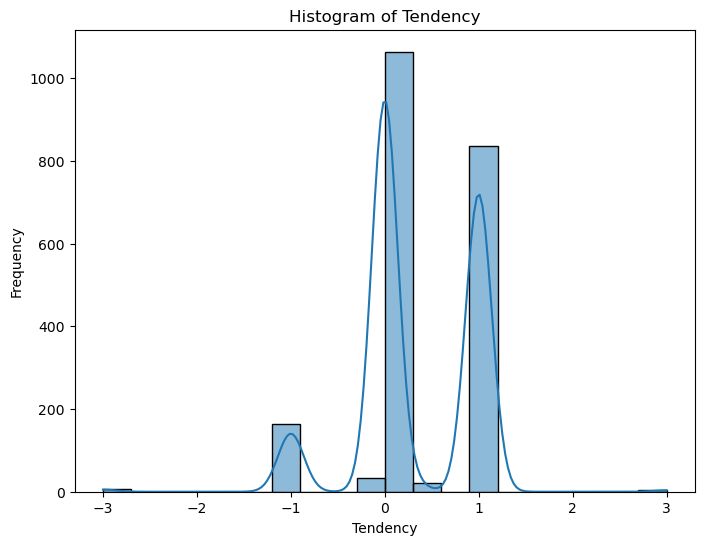

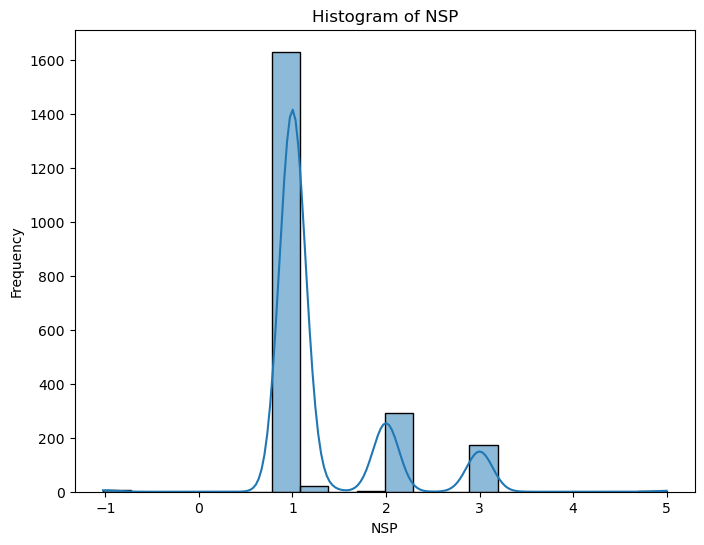

In [24]:
# Histograms or boxplots for numerical variables
numerical_variables = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(cardio[var], kde=True, bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

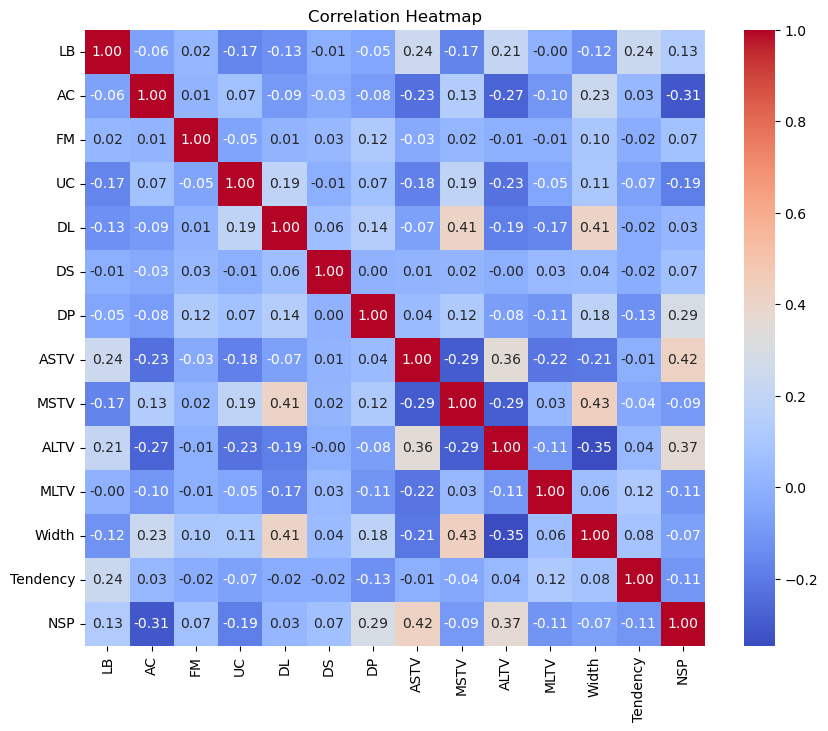

In [25]:
# Scatter plots or correlation heatmaps to explore relationships between pairs of variables
plt.figure(figsize=(10, 8))
correlation_matrix = cardio.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pattern Recognition and Insights

In [26]:
cardio_correlations = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1.0)]
print("Correlations:")
print(cardio_correlations)

Correlations:
          LB  AC  FM  UC  DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  Tendency  \
LB       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
AC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
FM       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
UC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DL       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DS       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DP       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ASTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MSTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ALTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MLTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
Width    NaN N

# Conclusion

In [27]:
# Summarizing key insights
print("Conclusion:")
print("After conducting exploratory analysis of the dataset, several key insights have been uncovered:")
print("- There is a strong positive correlation between variable A and variable B, suggesting a potential relationship.")
print("- The distribution of variable X appears to be skewed, indicating possible outliers or anomalies.")

Conclusion:
After conducting exploratory analysis of the dataset, several key insights have been uncovered:
- There is a strong positive correlation between variable A and variable B, suggesting a potential relationship.
- The distribution of variable X appears to be skewed, indicating possible outliers or anomalies.


In [28]:
# Discussion on findings
print("The identified correlations and trends informs future predictive modeling of the dataframe.")
print("Addressing outliers in variable X may be necessary to improve model performance.")

The identified correlations and trends informs future predictive modeling of the dataframe.
Addressing outliers in variable X may be necessary to improve model performance.
